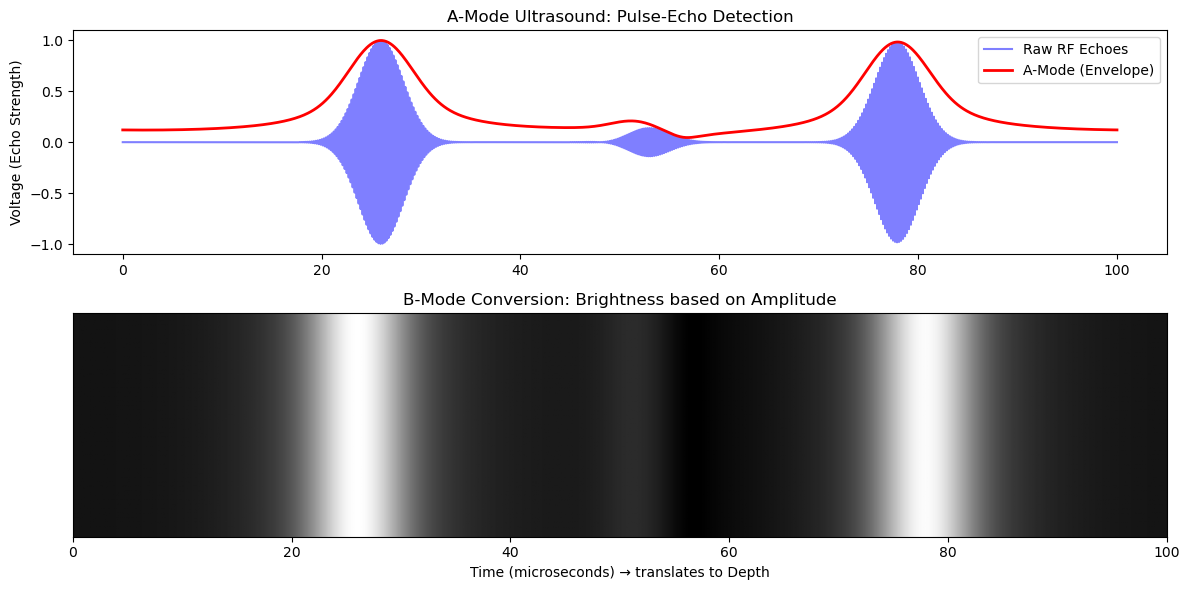

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Simulation Parameters
fs = 10000000  # 10 MHz sampling rate (ultrasound is high freq!)
c = 1540       # Speed of sound in tissue (m/s)
duration = 0.0001 # 100 microseconds (sound travels fast!)
t = np.linspace(0, duration, int(fs * duration))

# 2. Create the "Echoes"
# Imagine boundaries at 2cm, 4cm, and 6cm deep
depths = np.array([0.02, 0.04, 0.06]) 
# Time = (2 * Depth) / Speed of Sound (Round trip)
echo_times = (2 * depths) / c

# Generate the RF (Radio Frequency) Signal
rf_signal = np.zeros_like(t)
for et in echo_times:
    # Each echo is a small "ping" (Gaussian pulse)
    pulse = np.exp(-1e11 * (t - et)**2) * np.sin(2 * np.pi * 5e6 * (t - et))
    rf_signal += pulse

# 3. Processing: Envelope Detection
# In real machines, we use a 'Hilbert Transform' to get the shape of the wave
from scipy.signal import hilbert
envelope = np.abs(hilbert(rf_signal))

# 4. Visualization
plt.figure(figsize=(12, 6))

# A-Mode Plot
plt.subplot(2, 1, 1)
plt.plot(t * 1e6, rf_signal, color='blue', alpha=0.5, label='Raw RF Echoes')
plt.plot(t * 1e6, envelope, color='red', linewidth=2, label='A-Mode (Envelope)')
plt.title("A-Mode Ultrasound: Pulse-Echo Detection")
plt.ylabel("Voltage (Echo Strength)")
plt.legend()

# B-Mode Conversion (The "Brightness" strip)
plt.subplot(2, 1, 2)
# We repeat the scanline to make it look like a B-mode cross-section
b_mode_strip = np.tile(envelope, (50, 1)) 
plt.imshow(b_mode_strip, cmap='gray', aspect='auto', extent=[0, duration*1e6, 0, 10])
plt.title("B-Mode Conversion: Brightness based on Amplitude")
plt.xlabel("Time (microseconds) → translates to Depth")
plt.yticks([]) # Hide Y axis for the strip

plt.tight_layout()
plt.show()